# Street Audit Data

### We have a dataset with 39 entries here, Let's see what problems people are facing in their surrounding.

## Importing data and Libraries

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches

## Exploring and Cleaning data

In [6]:
responses = pd.read_csv('results-20220331-181556 - results-20220331-181556.csv')

In [7]:
responses.head()

,inserted_at,street_state,street_cityordistrict,street_ward,street_wardnumber,street_pic,area_type,street_houses,street_pothole,street_footpath,...,street_stormwater,street_flood,street_waterwastage,street_frequency_waste,street_blackspots,street_dustbin,street_overflow,street_burning,street_open,street_rodents
0,2022-02-19 15:47:02,All Responses,Banglore,Na,Na,https://filemanager.gupshup.io/fm/wamedia/RBGl...,RESIDENTIAL,100.0,NO,YES,...,NO,NO,NO,Daily,NO,NO,NO,NO,NO,OCCASIONALLY
1,2022-03-02 16:58:44,All Responses,Chennai,Adyar,177,https://filemanager.gupshup.io/fm/wamedia/RBGl...,RESIDENTIAL,11.0,YES,YES,...,YES,"Yes, Not severe",NO,5-6 times a week,NO,NO,NO,NO,NO,OCCASIONALLY
2,2022-03-15 12:57:22,All Responses,Abc,Na,Na,https://filemanager.gupshup.io/fm/wamedia/RBGl...,INDUSTRIAL,88.0,NO,Not good condition,...,NO,NO,NO,No Collection,NO,NO,NO,NO,NO,NO
3,2022-03-15 12:56:11,All Responses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-19 18:25:06,All Responses,kk,na,100,https://filemanager.gupshup.io/fm/wamedia/RBGl...,INDUSTRIAL,10.0,NO,YES,...,NO,NO,NO,Daily,NO,NO,NO,NO,NO,NO


In [8]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   inserted_at                 39 non-null     object 
 1   street_state                38 non-null     object 
 2   street_cityordistrict       37 non-null     object 
 3   street_ward                 18 non-null     object 
 4   street_wardnumber           15 non-null     object 
 5   street_pic                  24 non-null     object 
 6   area_type                   23 non-null     object 
 7   street_houses               23 non-null     float64
 8   street_pothole              23 non-null     object 
 9   street_footpath             23 non-null     object 
 10  street_vehicles             23 non-null     object 
 11  street_parkingissue         23 non-null     object 
 12  street_streetlights         23 non-null     float64
 13  street_workingstreetlights  22 non-nu

In [9]:
responses.describe()

,street_houses,street_streetlights,street_workingstreetlights
count,23.000000,23.000000,22.000000
mean,81.000000,12.000000,2.681818
std,156.156681,15.579707,5.121257
min,2.000000,0.000000,0.000000
25%,11.500000,4.500000,0.000000
50%,25.000000,9.000000,0.000000
75%,74.000000,15.000000,1.750000
max,720.000000,77.000000,20.000000


In [10]:
responses.shape

(39, 28)

In [11]:
responses.isnull().sum()

inserted_at                    0
street_state                   1
street_cityordistrict          2
street_ward                   21
street_wardnumber             24
street_pic                    15
area_type                     16
street_houses                 16
street_pothole                16
street_footpath               16
street_vehicles               16
street_parkingissue           16
street_streetlights           16
street_workingstreetlights    17
street_signboards             17
street_transformers           18
street_safe                   18
street_unsafe                 34
street_stormwater             18
street_flood                  18
street_waterwastage           18
street_frequency_waste        18
street_blackspots             18
street_dustbin                18
street_overflow               18
street_burning                18
street_open                   18
street_rodents                18
dtype: int64

In [12]:
cleaned = responses.dropna(subset = ['area_type'])          # Cleaned dataset

### Exploring the new cleaned dataset

In [13]:
cleaned.head()

,inserted_at,street_state,street_cityordistrict,street_ward,street_wardnumber,street_pic,area_type,street_houses,street_pothole,street_footpath,...,street_stormwater,street_flood,street_waterwastage,street_frequency_waste,street_blackspots,street_dustbin,street_overflow,street_burning,street_open,street_rodents
0,2022-02-19 15:47:02,All Responses,Banglore,Na,Na,https://filemanager.gupshup.io/fm/wamedia/RBGl...,RESIDENTIAL,100.0,NO,YES,...,NO,NO,NO,Daily,NO,NO,NO,NO,NO,OCCASIONALLY
1,2022-03-02 16:58:44,All Responses,Chennai,Adyar,177,https://filemanager.gupshup.io/fm/wamedia/RBGl...,RESIDENTIAL,11.0,YES,YES,...,YES,"Yes, Not severe",NO,5-6 times a week,NO,NO,NO,NO,NO,OCCASIONALLY
2,2022-03-15 12:57:22,All Responses,Abc,Na,Na,https://filemanager.gupshup.io/fm/wamedia/RBGl...,INDUSTRIAL,88.0,NO,Not good condition,...,NO,NO,NO,No Collection,NO,NO,NO,NO,NO,NO
4,2022-02-19 18:25:06,All Responses,kk,na,100,https://filemanager.gupshup.io/fm/wamedia/RBGl...,INDUSTRIAL,10.0,NO,YES,...,NO,NO,NO,Daily,NO,NO,NO,NO,NO,NO
5,2022-02-22 13:38:50,All Responses,Bangalore,Hudi,54,https://filemanager.gupshup.io/fm/wamedia/RBGl...,RESIDENTIAL,10.0,YES,Not good condition,...,YES,"Yes, Not severe",YES,Daily,YES,YES,YES,YES,YES,NO


In [14]:
cleaned.shape                  # Checking the dimensions after cleaning it 

(23, 28)

In [15]:
cleaned.describe()             # Basic statistics

,street_houses,street_streetlights,street_workingstreetlights
count,23.000000,23.000000,22.000000
mean,81.000000,12.000000,2.681818
std,156.156681,15.579707,5.121257
min,2.000000,0.000000,0.000000
25%,11.500000,4.500000,0.000000
50%,25.000000,9.000000,0.000000
75%,74.000000,15.000000,1.750000
max,720.000000,77.000000,20.000000


1- Average number of street_houses are 81 

Average number of street lights are 12 on the roads

The average working street lights are even less, it is round off to 3!

In [16]:
cleaned.isnull().sum()         # Hence our data is now cleaned!

inserted_at                    0
street_state                   0
street_cityordistrict          0
street_ward                   12
street_wardnumber             12
street_pic                     0
area_type                      0
street_houses                  0
street_pothole                 0
street_footpath                0
street_vehicles                0
street_parkingissue            0
street_streetlights            0
street_workingstreetlights     1
street_signboards              1
street_transformers            2
street_safe                    2
street_unsafe                 18
street_stormwater              2
street_flood                   2
street_waterwastage            2
street_frequency_waste         2
street_blackspots              2
street_dustbin                 2
street_overflow                2
street_burning                 2
street_open                    2
street_rodents                 2
dtype: int64

In [17]:
cleaned['street_cityordistrict'].value_counts()    # Locations of people taking this survey

Chennai                           5
Bangalore                         5
Mumbai                            2
Thanjavur district/ Kumbakonam    1
Abc                               1
Kharagpur                         1
Guntur                            1
Ludhiana                          1
Osmanabad                         1
Banglore                          1
Pune                              1
kanpur                            1
kk                                1
Krishnagiri                       1
Name: street_cityordistrict, dtype: int64

In [18]:
cleaned['street_ward'].value_counts() # Only 9 people know the name of their ward

Na                2
Hoodi             1
Kolathur          1
K                 1
Hudi              1
Ward              1
Adyar             1
Ward 42           1
West midnapore    1
na                1
Name: street_ward, dtype: int64

In [19]:
cleaned['area_type'].value_counts()  # 4 categories division 

RESIDENTIAL    17
OTHER           3
INDUSTRIAL      2
Commercial      1
Name: area_type, dtype: int64

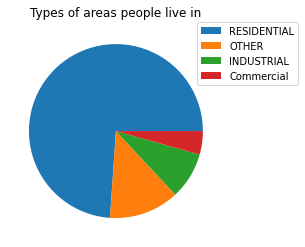

In [20]:
area_type = [17,3,2,1]
labelz = ['RESIDENTIAL', 'OTHER', 'INDUSTRIAL', 'Commercial']
plt.pie(area_type)
plt.title('Types of areas people live in')
plt.legend(labelz, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.show()

In [21]:
cleaned.street_houses.mean()                # The average houses on the streets are 81

81.0

In [70]:
cleaned['street_houses'].value_counts().count()  # No of people who filled out this column 

16

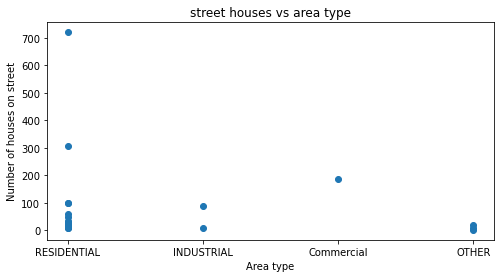

In [33]:
plt.figure(figsize = (8,4))
plt.scatter((cleaned['area_type']), cleaned['street_houses'])
plt.xlabel('Area type')
plt.ylabel('Number of houses on street')
plt.title('street houses vs area type')
plt.show()

In [36]:
cleaned['street_pothole'].value_counts()    # 12 people are facing potholes, 11 aren't

YES    12
NO     11
Name: street_pothole, dtype: int64

In [37]:
cleaned['street_footpath'].value_counts()   # 13 people have footpaths. 7 nope. And 3 do have but in bad condition

YES                   13
NO                     7
Not good condition     3
Name: street_footpath, dtype: int64

In [39]:
cleaned['street_vehicles'].value_counts()   # 15/23 people's vehicles are parked on the footpath/sides

YES    15
NO      8
Name: street_vehicles, dtype: int64

In [39]:
cleaned['street_safe'].value_counts()       # How many people find their streets safe

YES    16
NO      5
Name: street_safe, dtype: int64

In [53]:
cleaned['street_flood'].value_counts()      # Do the road floods during heavy rains

NO                 10
YES                 6
Yes, Not severe     5
Name: street_flood, dtype: int64

In [55]:
cleaned['street_waterwastage'].value_counts() # If people are observing water wastage on the streets

NO                 14
YES                 6
Yes, Not severe     1
Name: street_waterwastage, dtype: int64

In [57]:
cleaned['street_frequency_waste'].value_counts()  # Garbage collection frequencies 

Daily               10
No Collection        5
5-6 times a week     3
3-4 times a week     2
Once a week          1
Name: street_frequency_waste, dtype: int64

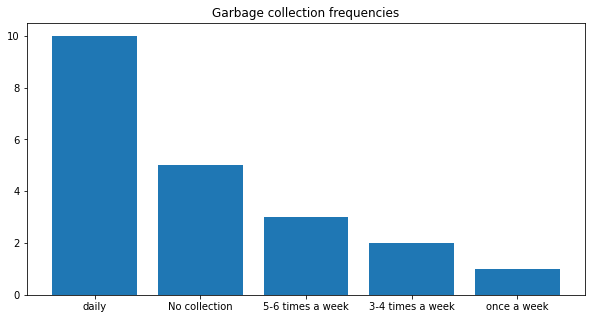

In [79]:
area_type = [10,5,3,2,1]
plt.figure(figsize = (10,5))
labelz = ['daily', 'No collection', '5-6 times a week', '3-4 times a week', 'once a week']
plt.bar(labelz, area_type)
plt.title('Garbage collection frequencies')
#plt.legend(labelz, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.show()

In [61]:
cleaned['street_blackspots'].value_counts() # 10 people can observe street blackspots out of 21

NO     11
YES    10
Name: street_blackspots, dtype: int64

In [62]:
cleaned['street_dustbin'].value_counts()   # Only 7 people have street dustbin out of 21

NO     14
YES     7
Name: street_dustbin, dtype: int64

In [63]:
cleaned['street_overflow'].value_counts()  # 3/7 people dustbin is overflowing out of 21

NO     18
YES     3
Name: street_overflow, dtype: int64

In [64]:
cleaned['street_burning'].value_counts()   # 4/21 people have observed burning of garbage on their streets

NO     17
YES     4
Name: street_burning, dtype: int64

In [65]:
cleaned['street_rodents'].value_counts()   # 13/21 people face troubles from pests or rodents

NO              8
OCCASIONALLY    8
YES             5
Name: street_rodents, dtype: int64